In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [5]:
N = 1000   # number of stocks
p = 300    # number of factors
T = 1200    # number of time periods

idiovol_sigma = np.sqrt(0.3*0.3/12)
e_mu = np.sqrt(0.2*0.2/12)
e_sigma = e_mu
mu = 0.1/12/e_mu
sigma_beta = 1
a = 1.5
b = 1.5
w0 = np.zeros(N) # for now
returns = []

# values_new = []
gamma = 1
c = 1
values_new = []


for s in range(1): # can change the simulation number
    t = np.random.normal(e_mu,e_sigma,N) # generate the eij for each factor
    betas = np.zeros((N,p)) # the decaying path of each factor beta
    betas[:,0] = t
    mus = np.zeros((N,p))
    mus[:,0] = mu
    for j in range(1,p):
        betas[:,j-1] = t*j**(-a)
        mus[:,j-1] = mu*j**(-b)
    alpha = (betas * mus).sum(axis = 1) # the factor risk premia
    beta_hat_stocks = [] # to store the betas for each stock after their ridge regression
    alpha_hat_stocks = [] # to store the alphas for each stock after their ridge regression
    sigma_ridge = []
    returns = []
#     lambdas = []
    for stock in range(N):
        f = np.random.multivariate_normal(np.zeros(p), np.identity(p), T) # for each stock generate the factor matrix
        epsilon = np.random.normal(0,idiovol_sigma,T) #generate the residuals
        r = alpha[stock] + np.array(betas[stock]).T @ f.T + epsilon # calculate the return series for each stock
        returns.append(r)
        lamb = idiovol_sigma**2 * (p+1)/((alpha[stock]**2 + sum(betas[stock]**2))*T)
#         lambdas.append(lamb)
        ridge = Ridge(alpha = lamb,fit_intercept = True)
        ridge.fit(f, r)
        beta_hat_stocks.append(ridge.coef_)
        alpha_hat_stocks.append(ridge.intercept_)
        sigma_ridge.append(np.var(r - ridge.intercept_ - ridge.coef_ @ f.T))
    
    sigma_hat = np.array(beta_hat_stocks) @ np.array(beta_hat_stocks).T + sigma_ridge @ np.identity(N)
    weights = np.linalg.inv(gamma * sigma_hat + c * np.identity(N)) @ (alpha_hat_stocks + c * w0)
    sigma_true = betas @ betas.T + np.identity(N)*idiovol_sigma**2 
    value = weights.T @ alpha - 0.5*gamma*weights.T @ sigma_true @ weights - 0.5*c*np.sqrt(sum((weights - w0)**2))
    values_new.append(value)

 

Text(0.5, 0, 'Simulated alpha')

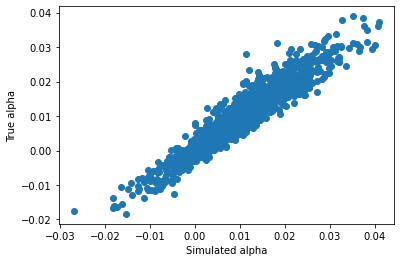

In [6]:
# idiovol_sigma**2 *(p+1)/((alpha[-10]**2 + sum(betas[-10]**2))*T)

plt.scatter(y = alpha, x = np.mean(returns,axis = 1))
plt.ylabel('True alpha')
plt.xlabel('Simulated alpha')

Text(0.5, 0, 'Simulated volatility')

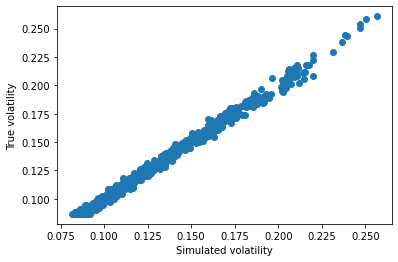

In [7]:
plt.scatter(y = np.sqrt(np.diagonal(sigma_true)), x = np.std(returns, axis = 1))
plt.ylabel('True volatility')
plt.xlabel('Simulated volatility')

In [62]:
value

-0.30665513587848386

In [41]:
# # np.array(betas[0]) @ np.array(betas[0])
# big = np.argmax(lambdas)
# idiovol_sigma**2 * (p+1)/(T*(sum(betas[big]**2) + alpha[big]**2))
# # es = np.random.normal(0,idiovol_sigma, 300)
# # min(es[es > 0])
# np.random.normal(0,idiovol_sigma, 1)

In [58]:
sum(weights)

2.3732074134483163